<a href="https://colab.research.google.com/github/PuruBhatnagar1197/Machine-Learning-Revision/blob/main/Linear_Regression_Revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### reading data
df=pd.read_csv(r"/content/Walmart.csv") ### want to predict weekly sales

In [ ]:
df.shape

(6435, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### changing data types

In [ ]:
## only date columns seems off so

df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

### Basic EDA

In [ ]:
## general look into basic info
df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']].select_dtypes(include=['int','float']).describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,100.140000,4.468000,227.232807,14.313000


In [ ]:
df=df.sort_values(by='Store')

In [ ]:
df['year']=pd.to_datetime(df['Date']).dt.year
df['month']=pd.to_datetime(df['Date']).dt.month

### Trend across all the 45 stores across all the months/year/date

<Axes: xlabel='month', ylabel='Weekly_Sales'>

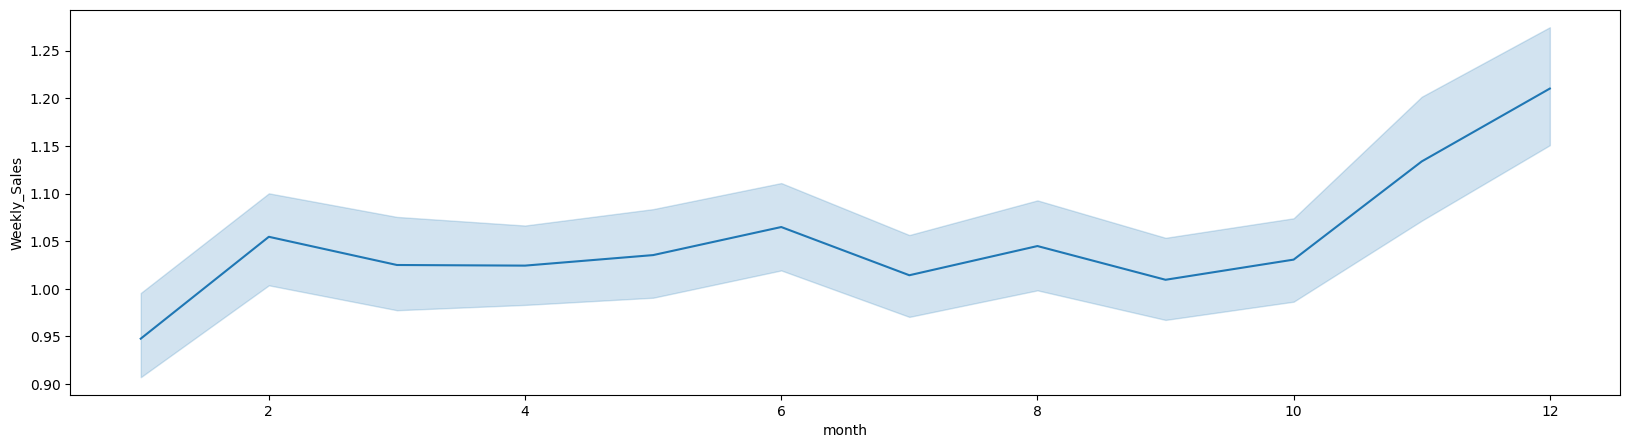

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=df['month'],y=(df['Weekly_Sales']/1e6)) ### sales generally expectionally get rise in the later part of the month during festive season

<Axes: xlabel='year', ylabel='Weekly_Sales'>

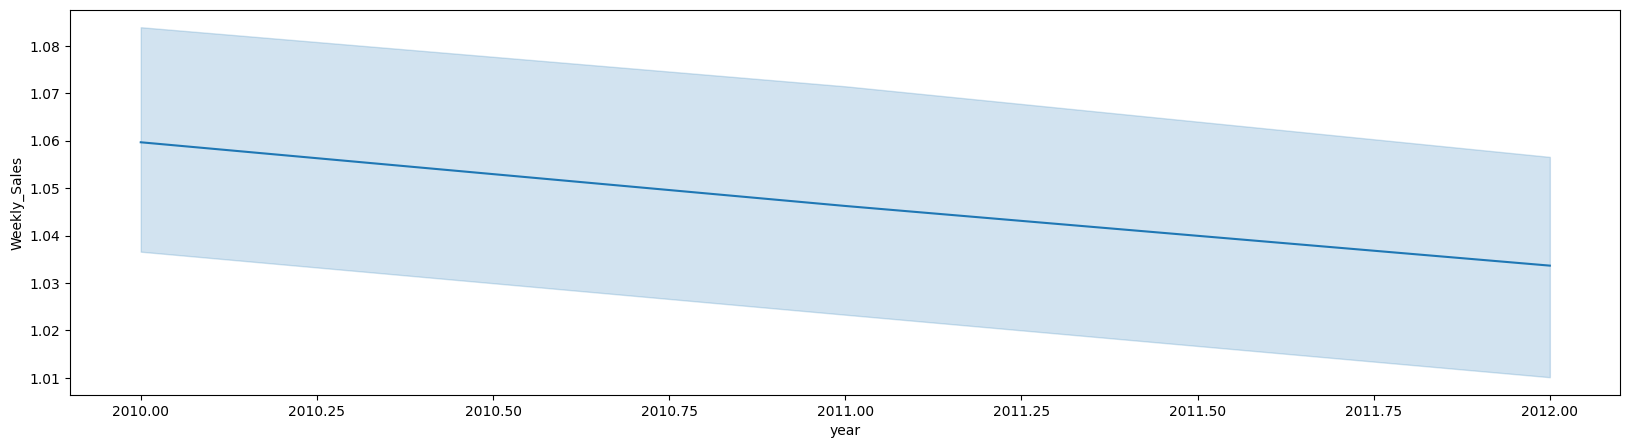

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=df['year'],y=(df['Weekly_Sales']/1e6)) ### overall across 45 stores the sales is declining yoy

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

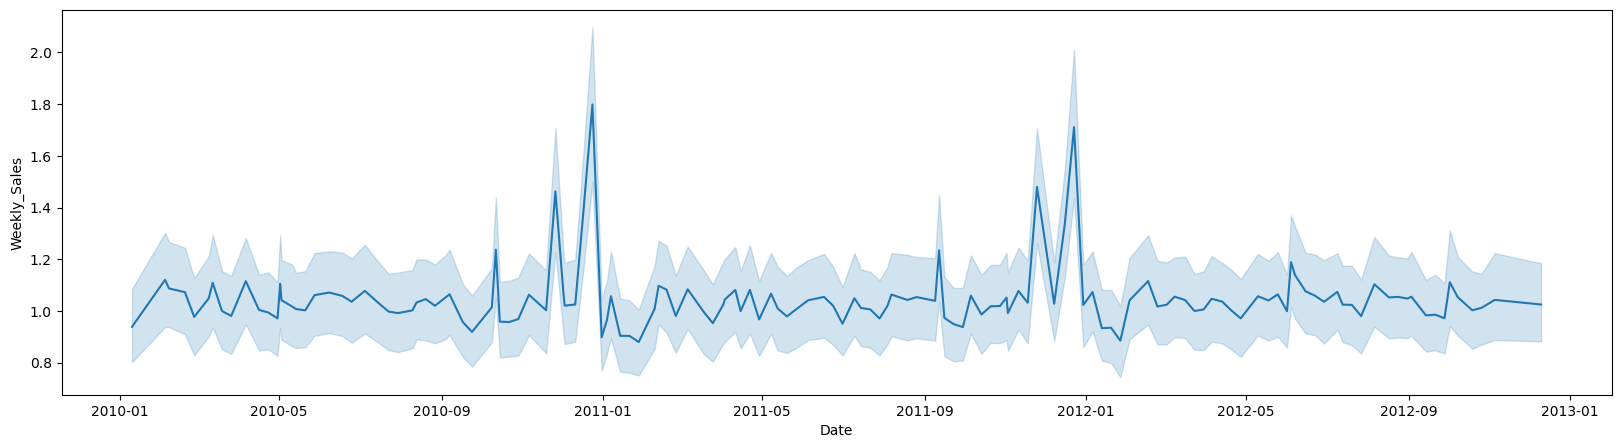

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=df['Date'],y=(df['Weekly_Sales']/1e6))

#### Looking into week of the year

### sales has follow some pattern in 2010 and 2012 but in 2011 there is some drop in the week level data too

In [ ]:
df['week_of_the_year']=df['Date'].dt.isocalendar().week

In [ ]:
x=df.pivot_table(values='Weekly_Sales',index='week_of_the_year', columns=['year'],aggfunc='sum').reset_index()

<Axes: >

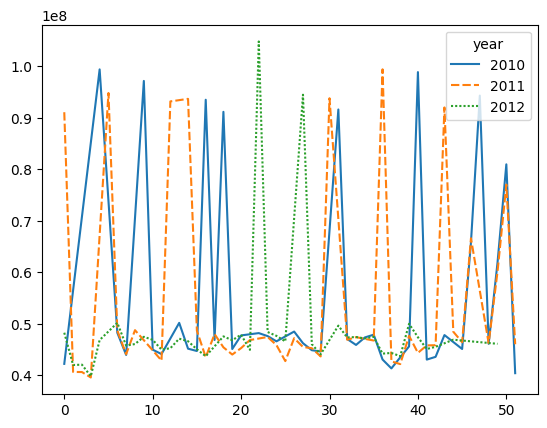

In [ ]:
y=x[[2010,2011,2012]]
sns.lineplot(data=y)

In [ ]:
df.groupby('year')['week_of_the_year'].agg('count')

year
2010    2160
2011    2340
2012    1935
Name: week_of_the_year, dtype: int64

In [ ]:
### common weeks data points
set_2010=set(df[df['year']==2010]['week_of_the_year'].unique())
set_2011=set(df[df['year']==2011]['week_of_the_year'].unique())
set_2012=set(df[df['year']==2012]['week_of_the_year'].unique())

In [ ]:
list_a=list(set_2010.intersection(set_2011).intersection(set_2012))

In [ ]:
temp_x=df[df['week_of_the_year'].isin(list_a)]

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

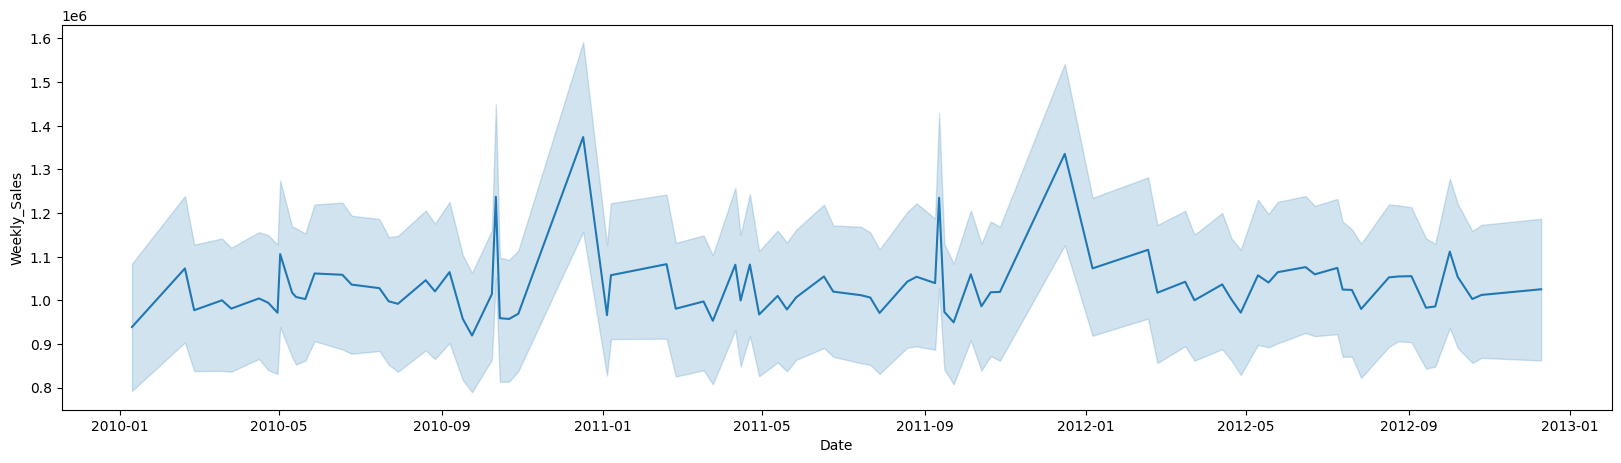

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=temp_x['Date'], y=temp_x['Weekly_Sales'])

<Axes: xlabel='Date', ylabel='Temperature'>

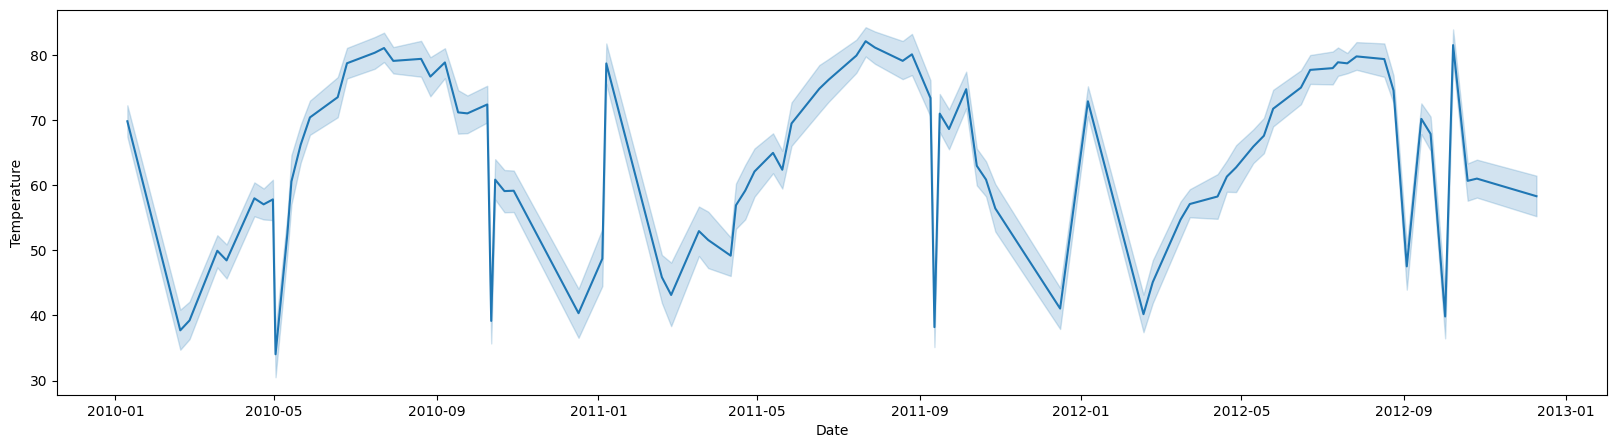

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=temp_x['Date'], y=temp_x['Temperature'])

<Axes: xlabel='Date', ylabel='Fuel_Price'>

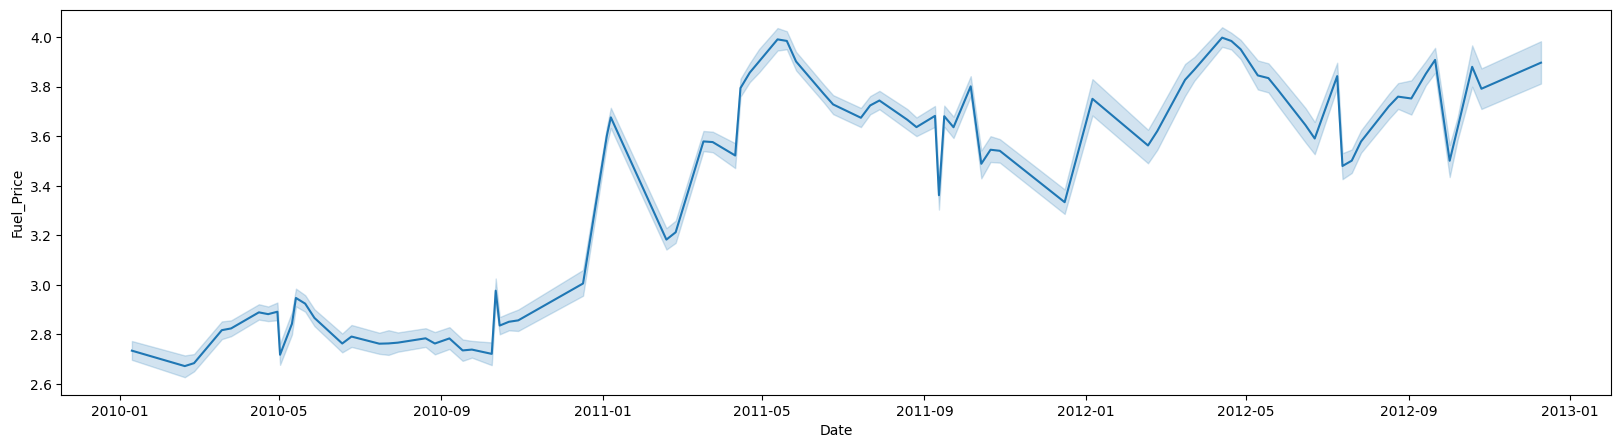

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=temp_x['Date'], y=temp_x['Fuel_Price'])

<Axes: xlabel='Date', ylabel='CPI'>

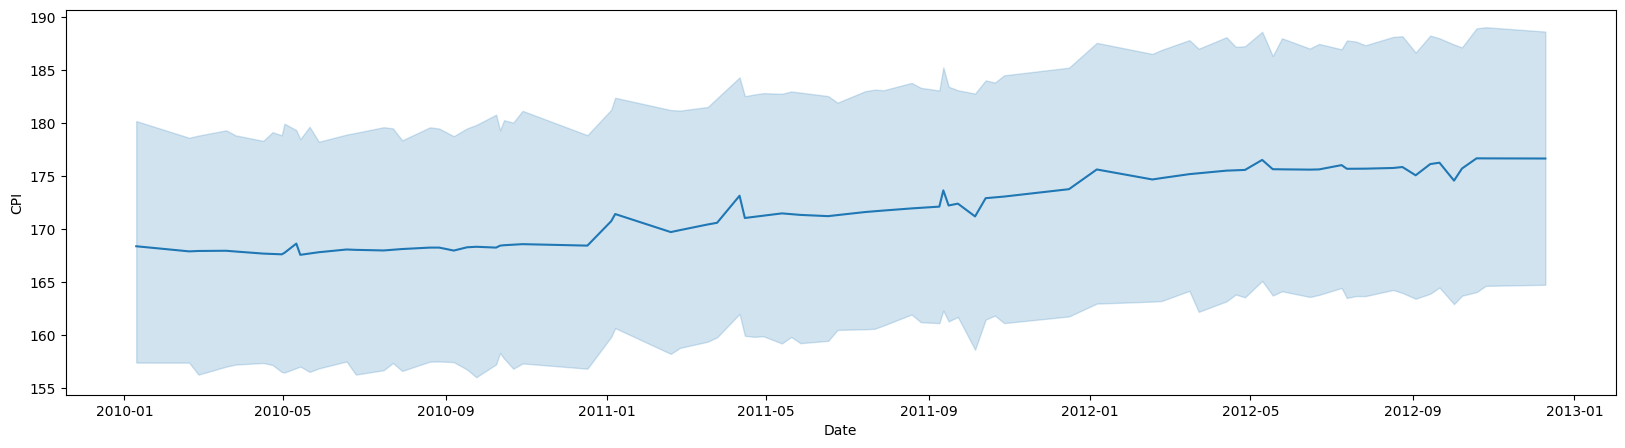

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=temp_x['Date'], y=temp_x['CPI'])

<Axes: xlabel='Date', ylabel='Unemployment'>

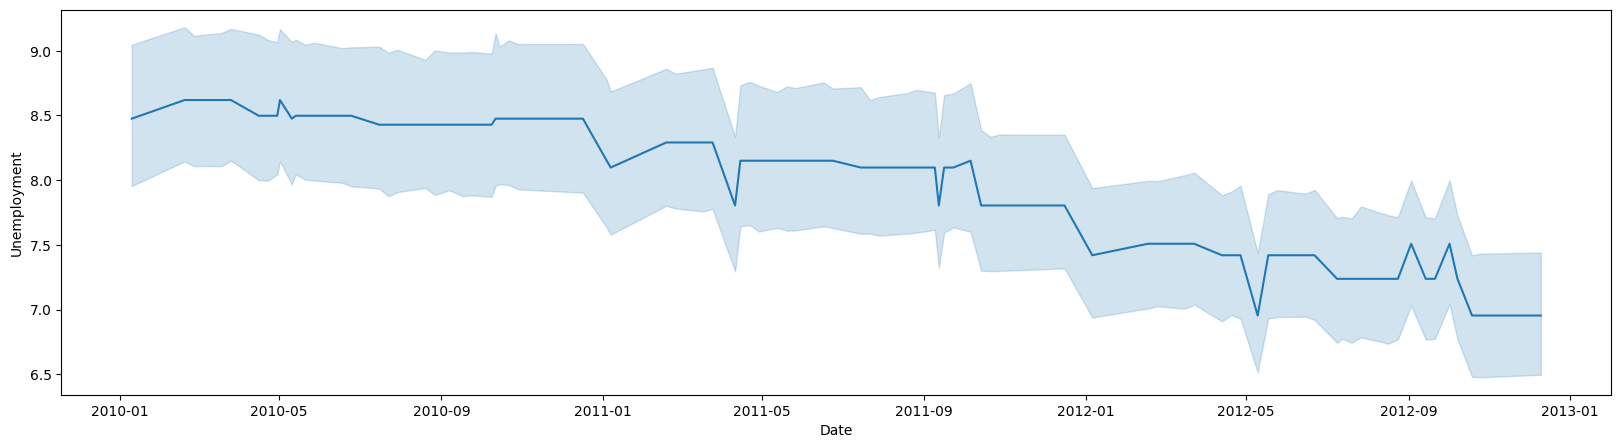

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=temp_x['Date'], y=temp_x['Unemployment'])

In [ ]:
##### next step
## 1. outlier treatment and findings
## 2. Holiday and non holiday sales comparison (we will be seeing box plot and its usage)
## 3. finally variables corr

<Axes: >

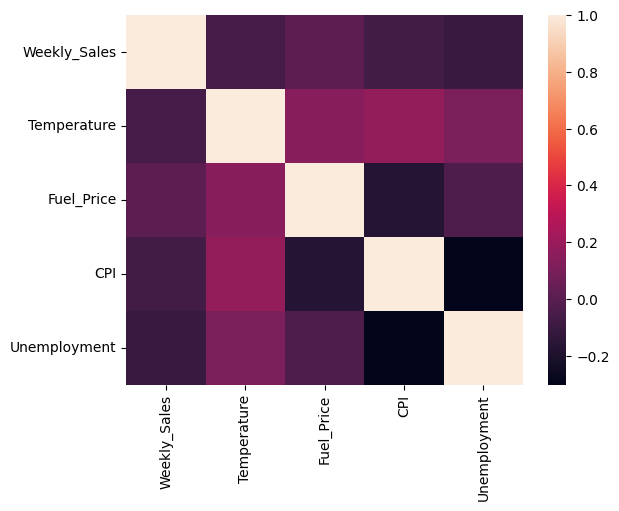

In [ ]:
sns.heatmap(df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']].corr())

<Axes: xlabel='Temperature', ylabel='Count'>

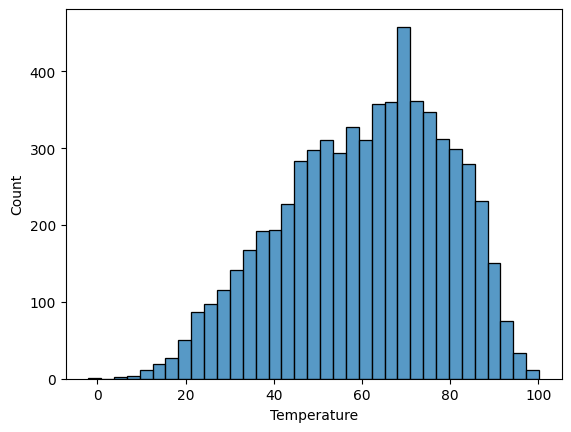

In [ ]:
sns.histplot(df['Temperature'])

<Axes: xlabel='CPI', ylabel='Count'>

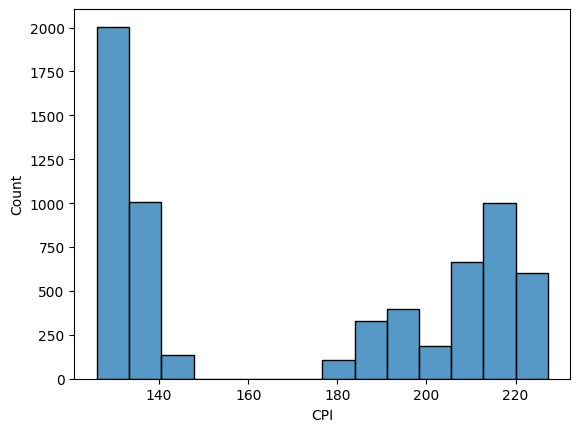

In [ ]:
sns.histplot(df['CPI'])  ### this feature can't beused directly need some transformation

<Axes: xlabel='Unemployment', ylabel='Count'>

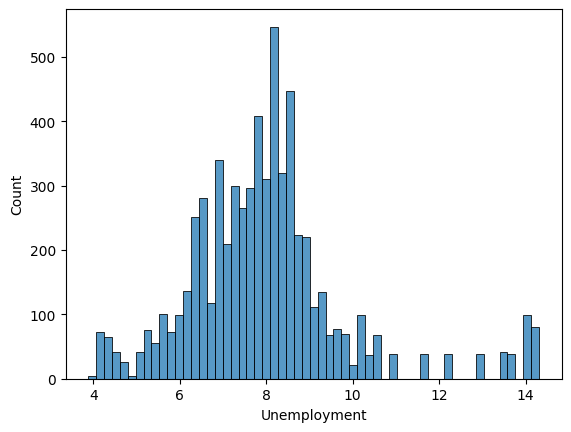

In [ ]:
sns.histplot(df['Unemployment'])

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

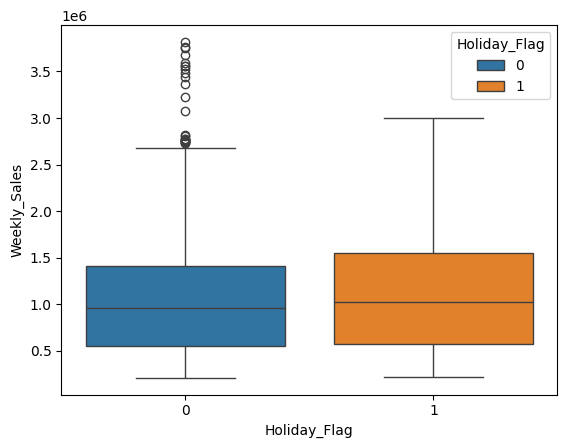

In [ ]:
sns.boxplot(x='Holiday_Flag',y='Weekly_Sales',hue='Holiday_Flag',data=df)

In [ ]:
df.pivot_table(values='Weekly_Sales',index='month', columns=['year'] ,aggfunc='sum')

year,2010,2011,2012
month,,,
1,4.223988e+07,2.119657e+08,1.722207e+08
2,1.915869e+08,1.876092e+08,1.428296e+08
3,1.862262e+08,1.365205e+08,2.307397e+08
4,1.838118e+08,2.789693e+08,1.825428e+08
5,2.806119e+08,1.828017e+08,1.422830e+08
6,1.424361e+08,1.401936e+08,2.923883e+08
7,1.842664e+08,2.244611e+08,1.845865e+08
8,1.845381e+08,1.880810e+08,1.916126e+08
9,1.797041e+08,2.310323e+08,1.797959e+08


In [ ]:
df.groupby(['Store'])['Weekly_Sales'].agg({'sum'}).reset_index().rename(columns={'sum':'sales_sum'}).sort_values(by='sales_sum',ascending=False).head(5)

,Store,sales_sum
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


Feature Building

In [ ]:
### since out model dependent variable are not directly correleated lets think about other features to build
df['employment']=100-df['Unemployment']

In [ ]:
df=df[['Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','employment']].copy(deep=True)

In [ ]:
q3=np.percentile(df['employment'],75)
q2=np.percentile(df['employment'],50)
q1=np.percentile(df['employment'],25)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

df1=df[(df['employment']>=lower_bound)&(df['employment']<=upper_bound)]

In [ ]:
df1

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,employment
0,1643690.90,0,42.31,2.572,211.096358,91.894
92,1594938.89,0,59.11,3.297,217.998085,92.134
93,1539483.70,0,62.25,3.308,218.220509,92.134
94,2033320.66,1,60.14,3.236,218.467621,92.134
95,1584083.95,0,48.91,3.172,218.714733,92.134
...,...,...,...,...,...,...
6340,680254.35,0,34.32,3.193,182.598306,91.451
6341,654018.95,0,24.78,3.205,182.658578,91.451
6342,644285.33,0,30.55,3.229,182.919337,91.451
6362,814395.17,0,73.88,3.881,185.648692,91.479


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=df1.drop('Weekly_Sales',axis=1)
y=df1['Weekly_Sales']
x_scaled=scaler.fit_transform(X)

now splitting

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y, test_size=0.2,random_state=10)

### Now make Linear regression code of yours

In [ ]:
### my Linear regression
class LinearRegression_me:
    def __init__(self,learning_rate=0.1,n_iterations=1000):
        self.learning_rate=learning_rate
        self.n_iterations=n_iterations
        self.bias=None
        self.weights=None

    def fit(self, x,y):
        n_sample, n_slope=x.shape
        self.weights=np.zeros(n_slope)
        self.bias=0
        ### gradient descent
        for _ in range(self.n_iterations):
            y_pred=np.dot(x,self.weights)+self.bias

            ## calculating descent
            dw=(1/n_sample)*np.dot(x.T,(y_pred-y))
            db=(1/n_sample)*np.sum(y_pred-y)

            ##updating weights and bias
            self.weights=self.weights-self.learning_rate*dw
            self.bias=self.bias-self.learning_rate*db

    def predict(self,x):
        return np.dot(x,self.weights)+self.bias

In [ ]:
ml_lr=LinearRegression_me(learning_rate=0.2,n_iterations=1000)
ml_lr.fit(x_train,y_train)
y_pred_me=ml_lr.predict(x_test)

In [ ]:
### sklearn lR
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)
y_pred_skl=lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_pred_skl,y_pred)

19470.721921406253

In [ ]:
mean_squared_error(y_pred_me,y_pred)

19470.721921357057